In [8]:
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
import seaborn as sns

from openbustools.drivecycle.physics import constants, trajectory, transit_bus, energy

In [9]:
traj=trajectory.RandomVehTrajectory()
traj_df = traj.to_df()
traj_df.head()

,Speed,Acceleration,Distance,Elevation,Time,Slope,Theta
0,24,-0.005914,4058,-69,169.083333,-0.033514,-0.033502
1,4,-0.022747,3517,-4,879.250000,0.018482,0.018480
2,1,-0.003308,907,144,907.000000,0.163175,0.161750
3,14,0.047656,3819,-66,272.785714,-0.054988,-0.054933
4,15,0.114504,131,-87,8.733333,-0.160305,-0.158953


In [15]:
bus_model = transit_bus.TransitBus()
conditions = constants.MoonConditions()
energy_model = energy.DriveCycleEnergyModel(bus_model, conditions)

In [16]:
traj_df['F_aero'], traj_df['F_grav'], traj_df['F_roll'], traj_df['F_acc'], traj_df['F_tot'] = energy_model.calcTotalLoad(traj, combine=False)
traj_df['P_motor'], traj_df['P_regen'], traj_df['P_aux'], traj_df['P_tot'] = energy_model.calcTotalPower(traj, combine=False)
traj_df.head()

,Speed,Acceleration,Distance,Elevation,Time,Slope,Theta,F_aero,F_grav,F_roll,F_acc,F_tot,P_motor,P_regen,P_aux,P_tot
0,24,-0.005914,4058,-69,169.083333,-0.033514,-0.033502,2.437344e-12,-788.702387,147.383505,-85.963529,-727.282411,-0.000000,-6059.563939,5154.639175,-904.924764
1,4,-0.022747,3517,-4,879.250000,0.018482,0.018480,6.770400e-14,435.107812,141.449736,-330.622690,245.934858,1255.931099,0.000000,5154.639175,6410.570275
2,1,-0.003308,907,144,907.000000,0.163175,0.161750,4.231500e-15,3792.087166,141.290796,-48.076075,3885.301887,4960.329242,0.000000,5154.639175,10114.968417
3,14,0.047656,3819,-66,272.785714,-0.054988,-0.054933,8.293740e-13,-1292.837940,143.357019,692.686567,-456.794354,-0.000000,-2220.116729,5154.639175,2934.522446
4,15,0.114504,131,-87,8.733333,-0.160305,-0.158953,9.520875e-13,-3727.076758,143.664303,1664.312977,-1919.099478,-0.000000,-9993.458018,5154.639175,-4838.818843


In [17]:
np.sum(traj_df['P_tot']*traj_df['Time']) / 60 / 60 / 1000

53.90838854356098

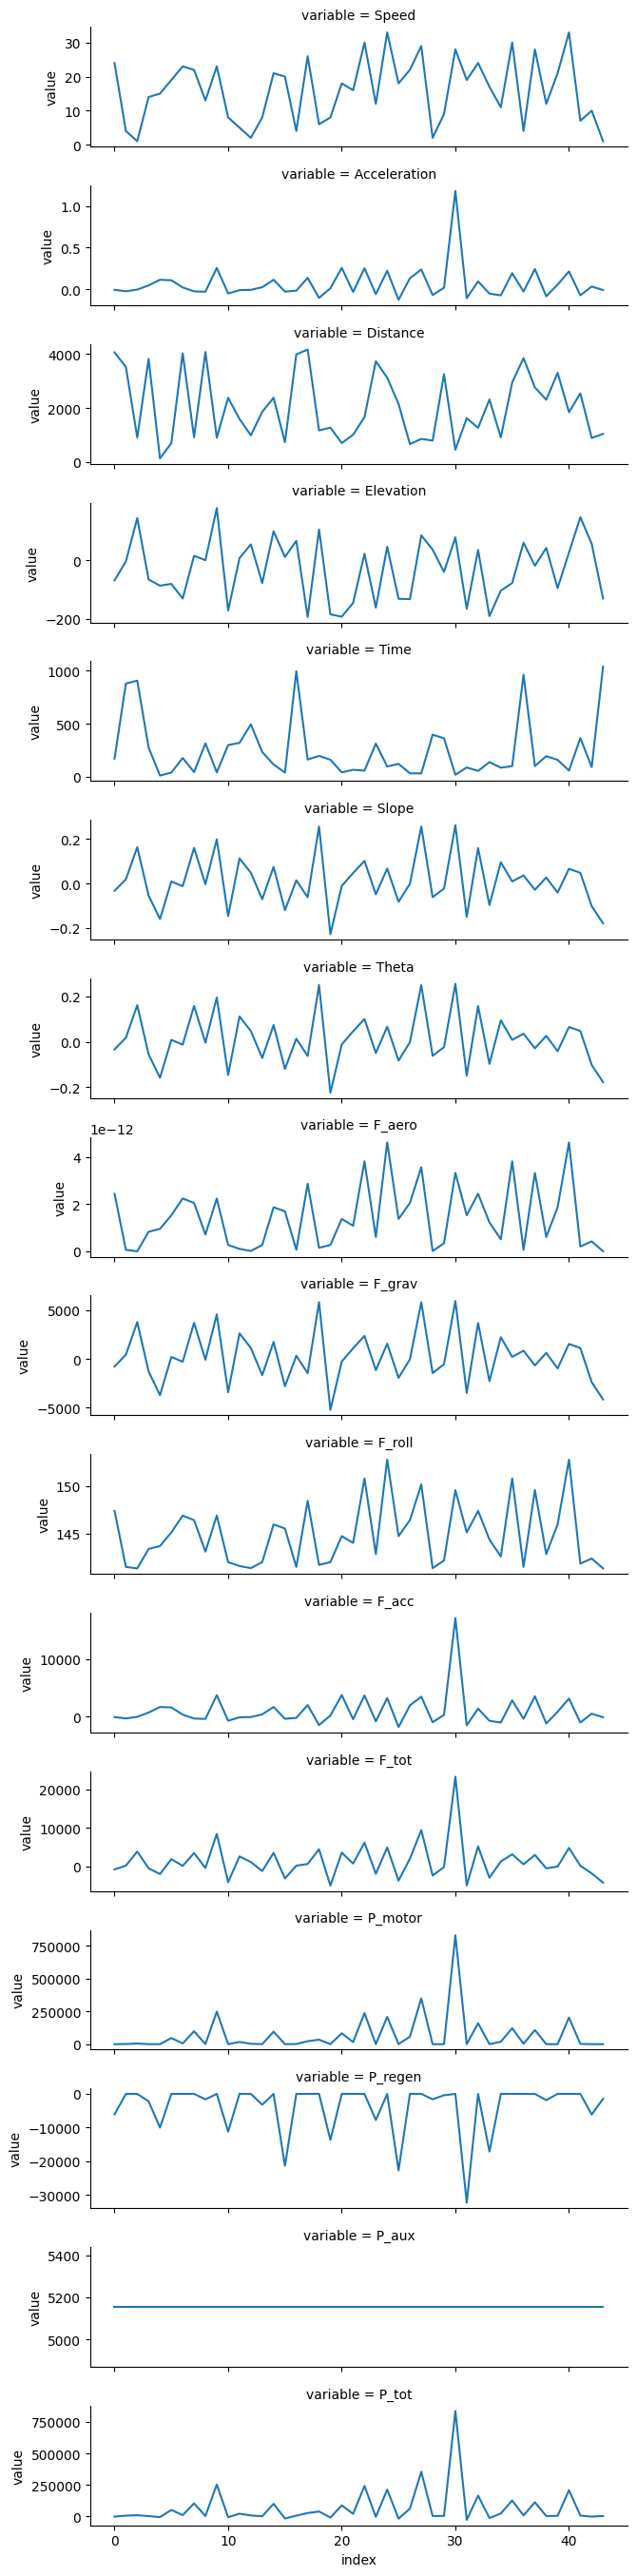

In [18]:
plot_df = traj_df.reset_index().melt(id_vars="index")
g = sns.FacetGrid(plot_df, row='variable', height=1.7, aspect=4, sharey=False)
g.map(sns.lineplot, 'index', 'value')